<a href="https://colab.research.google.com/github/iamasifiqbal/ML_Projects/blob/main/Project_of_mahfuz_sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import queue as Q
import numpy as np
import matplotlib.pyplot as plt
import random
from operator import itemgetter
%matplotlib inline

In [ ]:
random.seed(1234)

In [ ]:
def generate(clusters,no_task,arrival_together):  # Generate the cluster information randomly
    for i in range(no_task):
        clusterno = random.randint(1,clusters)    # Randomly select a cluster
        workload = random.randint(1,25)           # Randomly select the workload of an individual cluster
        if(arrival_together  == False):
            arrival_time = random.randint(1,10)   # Select an random arrival time between 1 to 10
            completion_time = random.randint(arrival_time+workload,arrival_time+workload+100) # Completion time as between range 100
        else:
            arrival_time = 0                       # As the arrival time is same for arrival_together is TRUE
            completion_time = 1000                 # Radomly taking completion_time 1000
        test_case.append((clusterno,arrival_time,workload,completion_time,i+1))
    return test_case
def generateworker(workerno):
    processors = []
    for i in range(workerno):
        processors.append(random.randint(11,21))
    return processors

In [ ]:
def sjf(cur_test,workers):
    task_cnt = len(cur_test)
    worker_cnt = len(workers)
    result = []
    ready_time = []
    cur_test.sort(key = itemgetter(2))
    cur_test.sort(key = itemgetter(0))
    cur_test.sort(key = itemgetter(1))
    for i in range(worker_cnt):
        ready_time.append(0)
    for x in cur_test:
        min_time = 100010
        for i in range(worker_cnt):
            estimated_time = x[2]/workers[i]+x[1]+max(0,ready_time[i]-x[1])
            if(estimated_time<min_time):
                min_time = estimated_time
                cur = i
        ready_time[cur] = min_time
        result.append((x[4],cur,min_time))
    return result

In [ ]:
def fcfs(cur_test,workers):
    task_cnt = len(cur_test)
    worker_cnt = len(workers)
    result = []
    ready_time = []
    cur_test.sort(key = itemgetter(0))
    cur_test.sort(key = itemgetter(1))
    for i in range(worker_cnt):
        ready_time.append(0)
    for x in cur_test:
        min_time = 100010
        for i in range(worker_cnt):
            estimated_time = x[2]/workers[i]+x[1]+max(0,ready_time[i]-x[1])
            if(estimated_time<min_time):
                min_time = estimated_time
                cur = i
        ready_time[cur] = min_time
        result.append((x[4],cur,min_time))
    return result

In [ ]:
def ljf(cur_test,workers):
    task_cnt = len(cur_test)
    worker_cnt = len(workers)
    result = []
    ready_time = []
    cur_test.sort(key = itemgetter(2),reverse = True)
    cur_test.sort(key = itemgetter(0))
    cur_test.sort(key = itemgetter(1))
    for i in range(worker_cnt):
        ready_time.append(0)
    for x in cur_test:
        min_time = 100010
        for i in range(worker_cnt):
            estimated_time = x[2]/workers[i]+x[1]+max(0,ready_time[i]-x[1])
            if(estimated_time<min_time):
                min_time = estimated_time
                cur = i
        ready_time[cur] = min_time
        result.append((x[4],cur,min_time))
    return result

In [ ]:
def edf(cur_test,workers):
    task_cnt = len(cur_test)
    worker_cnt = len(workers)
    result = []
    ready_time = []
    cur_test.sort(key = itemgetter(3))
    cur_test.sort(key = itemgetter(0))
    cur_test.sort(key = itemgetter(1))
    for i in range(worker_cnt):
        ready_time.append(0)
    for x in cur_test:
        min_time = 100010
        for i in range(worker_cnt):
            estimated_time = x[2]/workers[i]+x[1]+max(0,ready_time[i]-x[1])
            if(estimated_time<min_time):
                min_time = estimated_time
                cur = i
        ready_time[cur] = min_time
        result.append((x[4],cur,min_time))
    return result

In [ ]:
def random_assignment(cur_test,workers):
    task_cnt = len(cur_test)
    worker_cnt = len(workers)
    result = []
    ready_time = []
    random.shuffle(cur_test)
    cur_test.sort(key = itemgetter(0))
    cur_test.sort(key = itemgetter(1))
    for i in range(worker_cnt):
        ready_time.append(0)
    for x in cur_test:
        min_time = 100010
        for i in range(worker_cnt):
            estimated_time = x[2]/workers[i]+x[1]+max(0,ready_time[i]-x[1])
            if(estimated_time<min_time):
                min_time = estimated_time
                cur = i
        ready_time[cur] = min_time
        result.append((x[4],cur,min_time))
    return result

In [ ]:
def analyze(x):
    reso = {}
    max_time = 0
    for xx in x:
        max_time = max(0,xx[2])
        if xx[1] in reso:
            reso[xx[1]].append(xx[0])
        else:
            reso[xx[1]]=[]
            reso[xx[1]].append(xx[0])
    return max_time 

In [ ]:
def simulate_and_plot_intra(no_of_simulations):
    sjf_result = []
    fcfs_result = []
    ljf_result = []
    edf_result = []
    random_assignment_result = []
    x_idx = np.arange(1,no_of_simulations+1,1)
    workers = generateworker(worker_no)
    for i in range(no_of_simulations):
        test = generate(cluster_no,total_task,arrival_once)
        sjf_result.append(analyze(sjf(test,workers)))
        fcfs_result.append(analyze(fcfs(test,workers)))
        ljf_result.append(analyze(ljf(test,workers)))
        edf_result.append(analyze(edf(test,workers)))
        random_assignment_result.append(analyze(random_assignment(test,workers)))
    plt.figure(figsize=(12,12))
    plt.plot(x_idx,sjf_result,color='r',label='sjf_intra')
    plt.plot(x_idx,fcfs_result,color='g',label='fcfs_intra')
    plt.plot(x_idx,ljf_result,color='b',label='ljf_intra')
    plt.plot(x_idx,edf_result,color='m',label='edf_intra')
    plt.plot(x_idx,random_assignment_result,color='k',label='random_assignment_intra')
    plt.legend()

In [ ]:
def simulate_and_plot_inter(no_of_simulations):
    sjf_result = []
    fcfs_result = []
    ljf_result = []
    edf_result = []
    random_assignment_result = []
    if different_workload == False:
        workers = generateworker(random.randint(1,5));
    x_idx = np.arange(1,no_of_simulations+1,1)
    
    for i in range(no_of_simulations):
        test = generate(cluster_no,total_task,arrival_once)
        if different_workload == True:
            workers = generateworker(random.randint(1,5))
        sjf_result.append(analyze(sjf(test,workers)))
        if different_workload == True:
            workers = generateworker(random.randint(1,5))
        fcfs_result.append(analyze(fcfs(test,workers)))
        if different_workload == True:
            workers = generateworker(random.randint(1,5))
        ljf_result.append(analyze(ljf(test,workers)))
        if different_workload == True:
            workers = generateworker(random.randint(1,5))
        edf_result.append(analyze(edf(test,workers)))
        if different_workload == True:
            workers = generateworker(random.randint(1,5))
        random_assignment_result.append(analyze(random_assignment(test,workers)))
    plt.figure(figsize=(12,12))
    plt.plot(x_idx,sjf_result,color='r',label='sjf_inter')
    plt.plot(x_idx,fcfs_result,color='g',label='fcfs_inter')
    plt.plot(x_idx,ljf_result,color='b',label='ljf_inter')
    plt.plot(x_idx,edf_result,color='m',label='edf_inter')
    plt.plot(x_idx,random_assignment_result,color='k',label='random_assignment_inter')
    plt.legend()

# Inputs
###### As the number of cluster increases, we can see no differences in INTRA-cluster system. But there are always some difference in INTER-cluster system for different Number of cluster.

## Different Arrival time

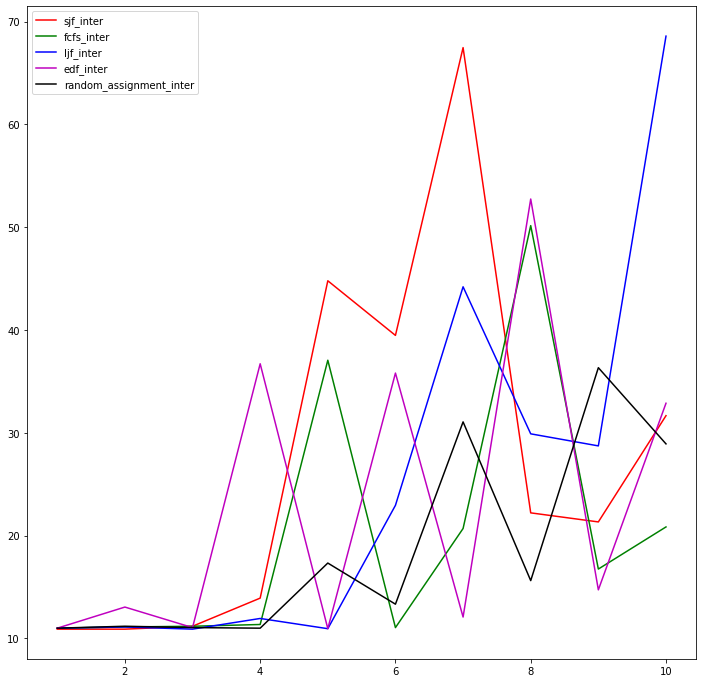

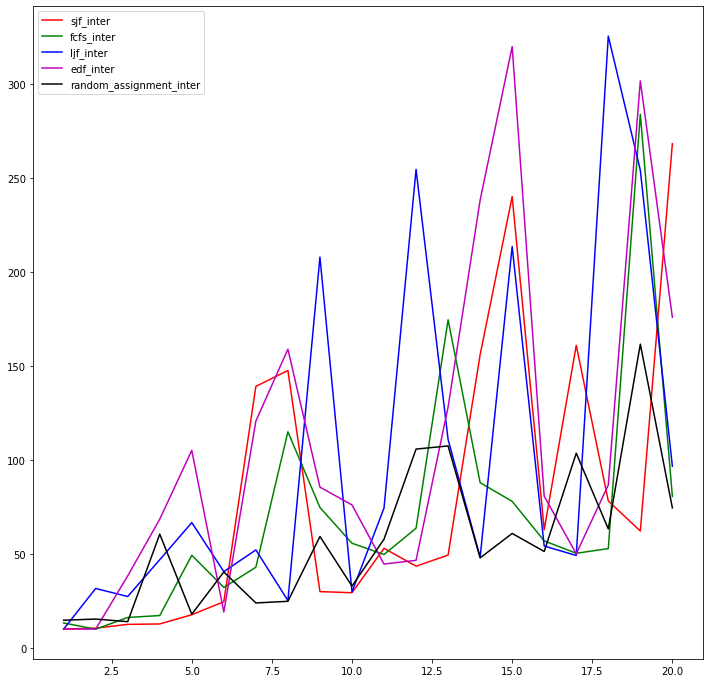

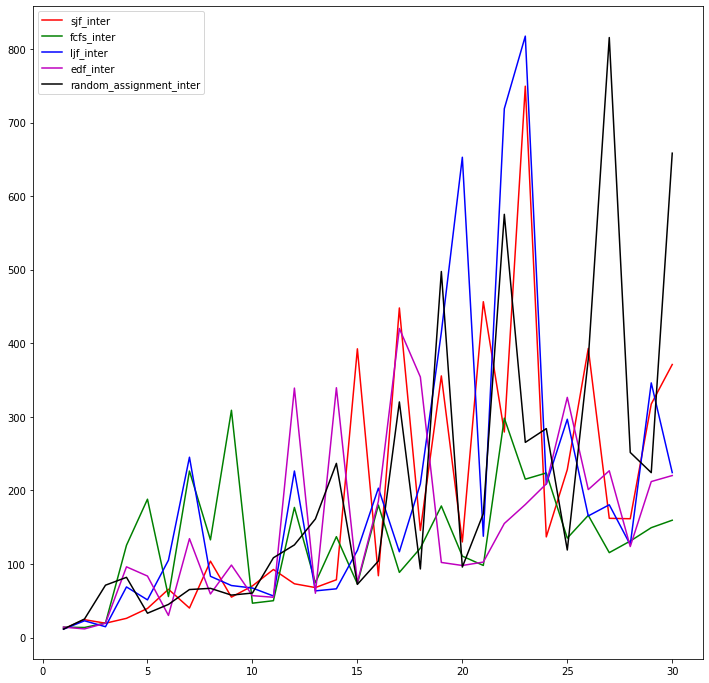

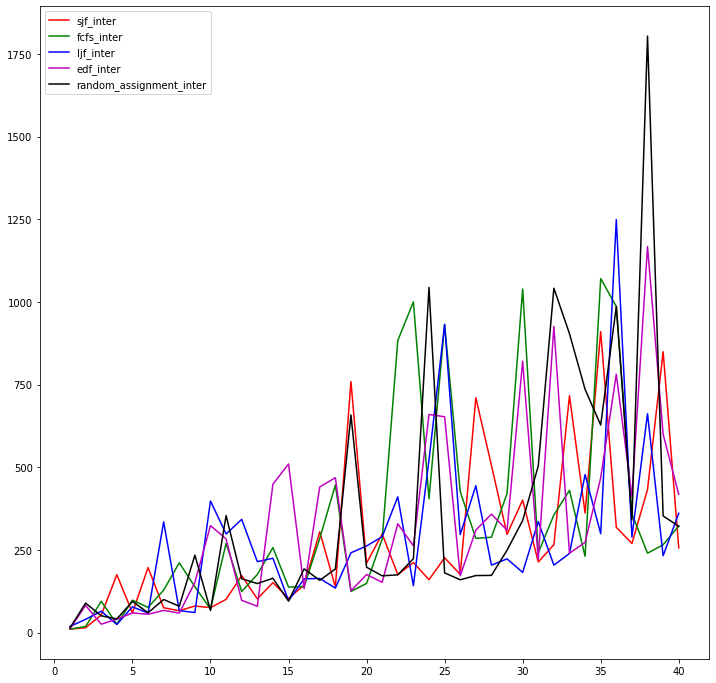

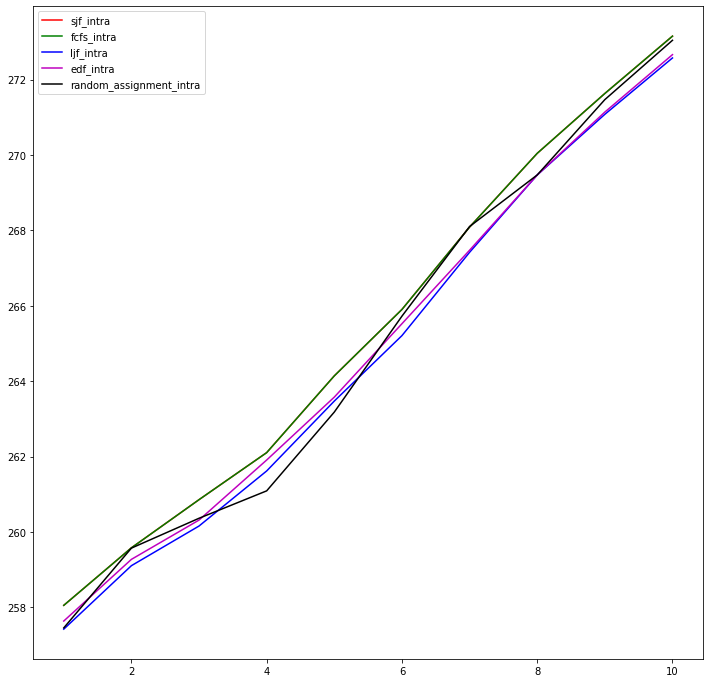

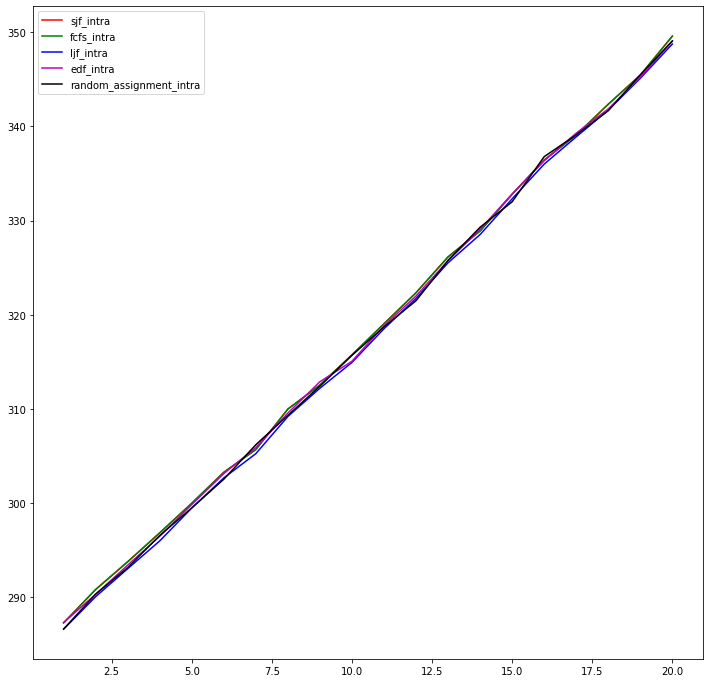

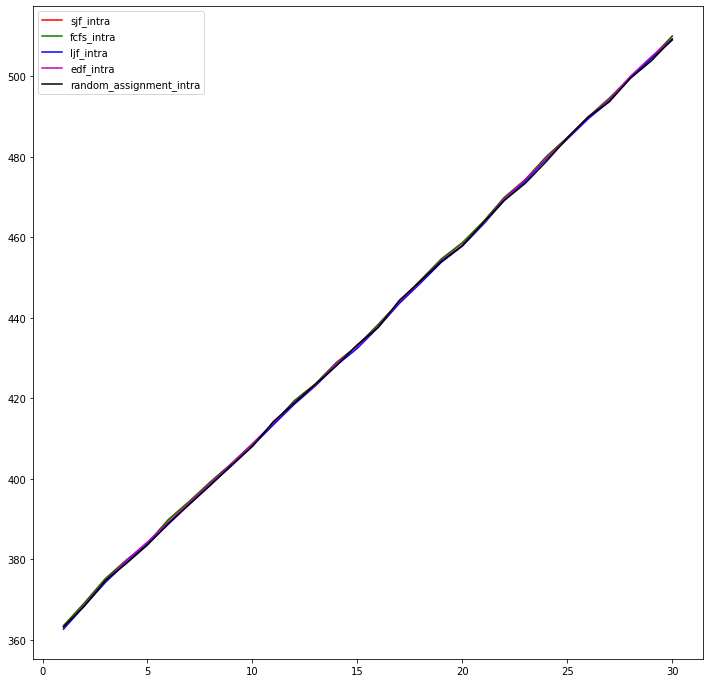

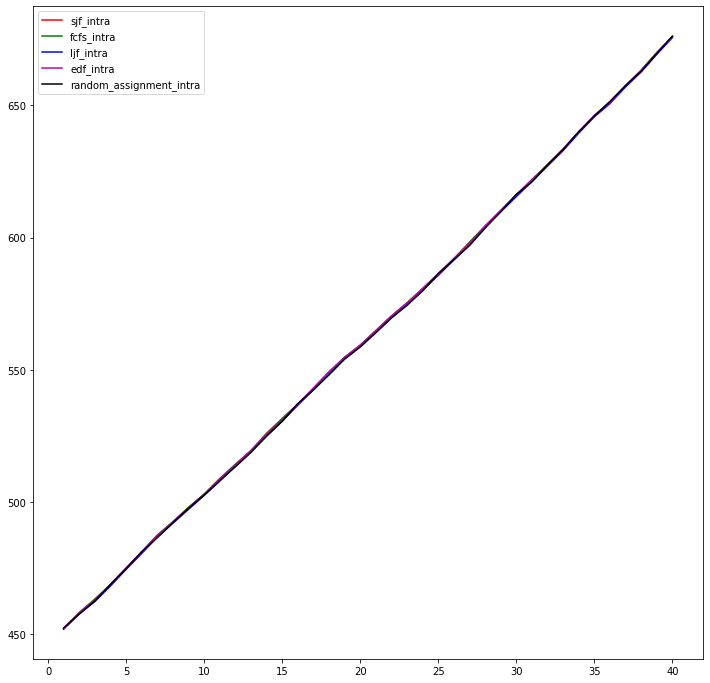

In [ ]:
for i in range(1,5):
  cluster_no = i
  task_per_cluster = 10
  total_task = cluster_no * task_per_cluster
  different_workload = True
  test_case = []
  arrival_once = False
  simulate_and_plot_inter(total_task)

for i in range(1,5):
  cluster_no = i
  task_per_cluster = 10
  total_task = cluster_no * task_per_cluster
  worker_no = 5
  arrival_once = False
  simulate_and_plot_intra(total_task)

## All arrive at once

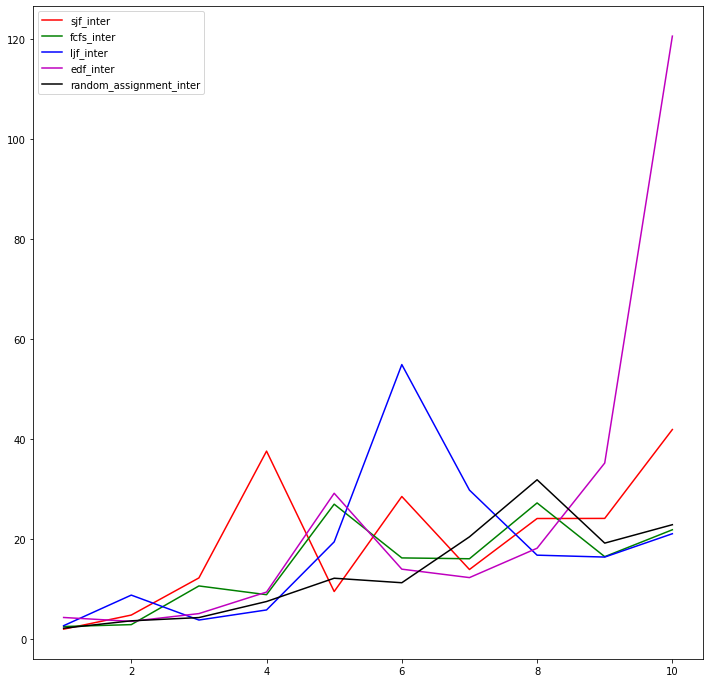

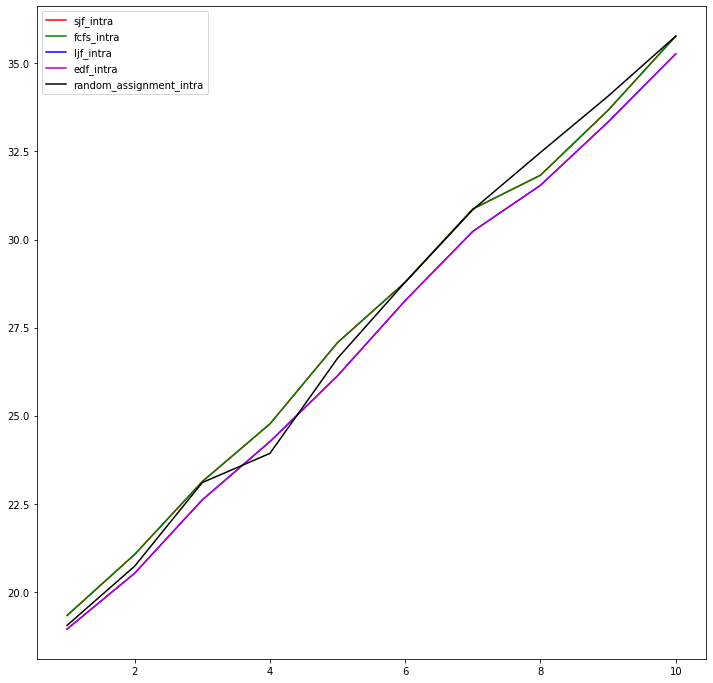

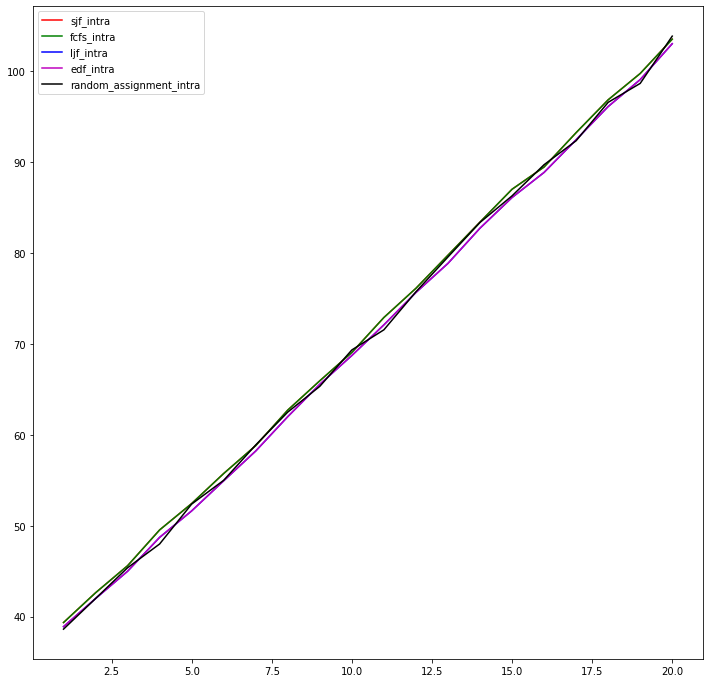

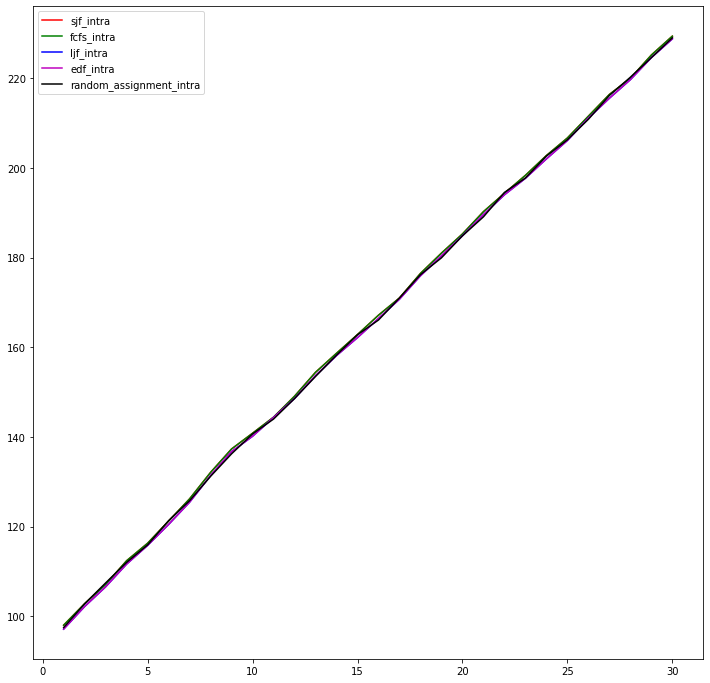

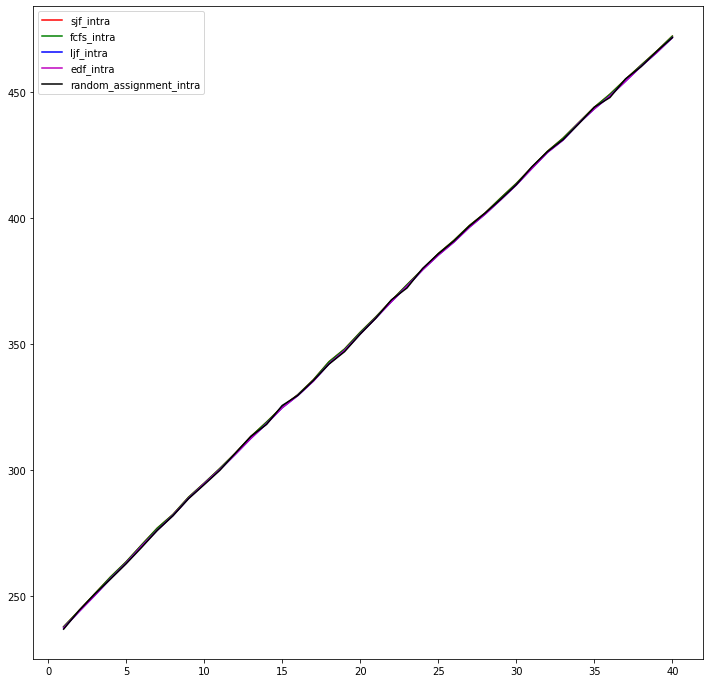

In [ ]:
cluster_no = 1
task_per_cluster = 10
total_task = cluster_no * task_per_cluster
different_workload = True
test_case = []
arrival_once = True
simulate_and_plot_inter(total_task)

for i in range(1,5):
  cluster_no = i
  task_per_cluster = 10
  total_task = cluster_no * task_per_cluster
  worker_no = 5
  arrival_once = True
  simulate_and_plot_intra(total_task)